In [1]:
import numpy as np
import matplotlib.pyplot as plt

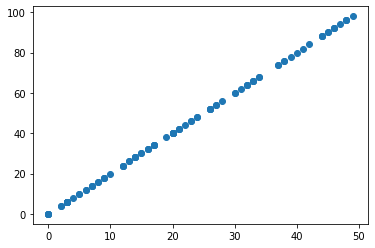

In [2]:
# define x and y (without noise)
true_w1 = 2
x = np.random.randint(0, 50, 100)
y = true_w1 * x
plt.scatter(x, y)
plt.show()

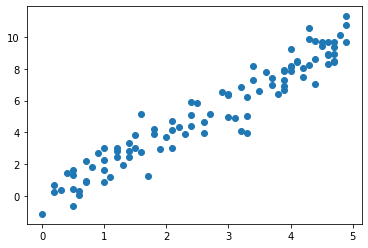

In [3]:
# define x and y (with noise)
true_w1 = 2
x = np.random.randint(0, 50, 100) / 10
y = true_w1 * x + np.random.normal(0, 1, 100)
plt.scatter(x, y)
plt.show()

Plot scattered data and fake line.


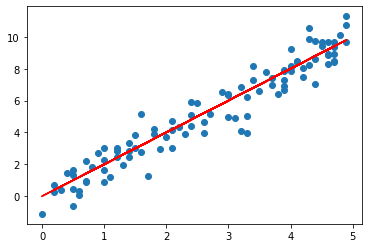

In [4]:
#@title Set Arguments

w1 = 2 #@param {type:"slider", min:-10, max:10, step:0.1}

print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, x*w1, 'red')
plt.show()

## Gradient of a line

If the model takes the form
$$y = wx + \epsilon$$
and the loss function is
$$\text{MSE} = \frac{1}{n} \sum_i (y - \hat{y}_i)^2$$
with $n$ samples, then we can write
$$
\begin{array}[cccc]\
\frac{\partial}{\partial w_1} \frac{1}{n} \sum_i (y - w_1 \cdot x)^2
&=& \frac{2}{n} \sum_i (y - w_1 \cdot x)(-x) \\
&=& -\frac{2}{n} \sum_i (y - w_1 x) (x) \\
\end{array}
$$

Plot scattered data and fake line.


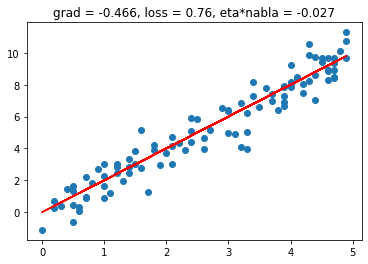

In [5]:
#@title Set Arguments

eta = 0.0585 #@param {type:"slider", min:0, max:0.1, step:0.00001}
w1 = 2 #@param {type:"slider", min:-10, max:10, step:0.1}
nabla = 2 * np.round(np.mean(((y - x*w1) * x)), 3)
loss = np.round(np.mean((y - x*w1)**2), 2)
delta = np.round(eta * nabla, 3)

print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, x*w1, 'red')
plt.title(f'grad = {nabla}, loss = {loss}, eta*nabla = {delta}')
plt.show()

Note that we have to drag the progress bar left and right to find the optimal spot and this is for one parameter only. One can imagine that things get much more complicated when there are millions of parameters. 

But no worries, neual network does it for us. 

In [6]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential(name='toy_model')
model.add(tf.keras.layers.Dense(units=1, activation=None, use_bias=False, input_shape=[1], name='layer1'))

In [17]:
model.summary()

Model: "toy_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd', loss='mse')

In [19]:
model.fit(x=x, y=y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 54.4062
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 12.1633
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 2.1789
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.9987
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8290
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7558
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7569
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7571
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7561
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7625


In [20]:
from sklearn.metrics import mean_absolute_error

In [25]:
yhat = model.predict(x).reshape(-1)
yhat.shape

4/4 [==============================] - 0s 5ms/step


(100,)

In [26]:
mean_absolute_error(y, yhat)

0.6868708647681643

Plot scattered data and fake line.


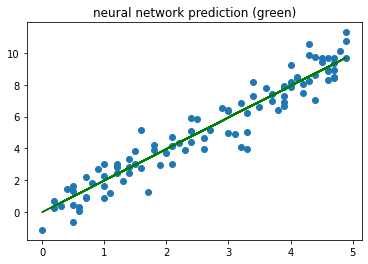

In [28]:
print(f'Plot scattered data and fake line.')
plt.scatter(x, y)
plt.plot(x, yhat, 'green')
plt.title(f'neural network prediction (green)')
plt.show()

How to access the weights? We use `model.weights`.

In [30]:
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9799683]], dtype=float32)>]

This is a list because it has `[]` around it. To retrieve the content, we use `[0]`. Then we convert it into `numpy` array by adding `.numpy()` behind it.

In [38]:
model.weights[0].numpy()

array([[1.9799683]], dtype=float32)

Hence, we know that there is one parameter and the numerical value is presented.